# Assignment 1


KeyError: 0

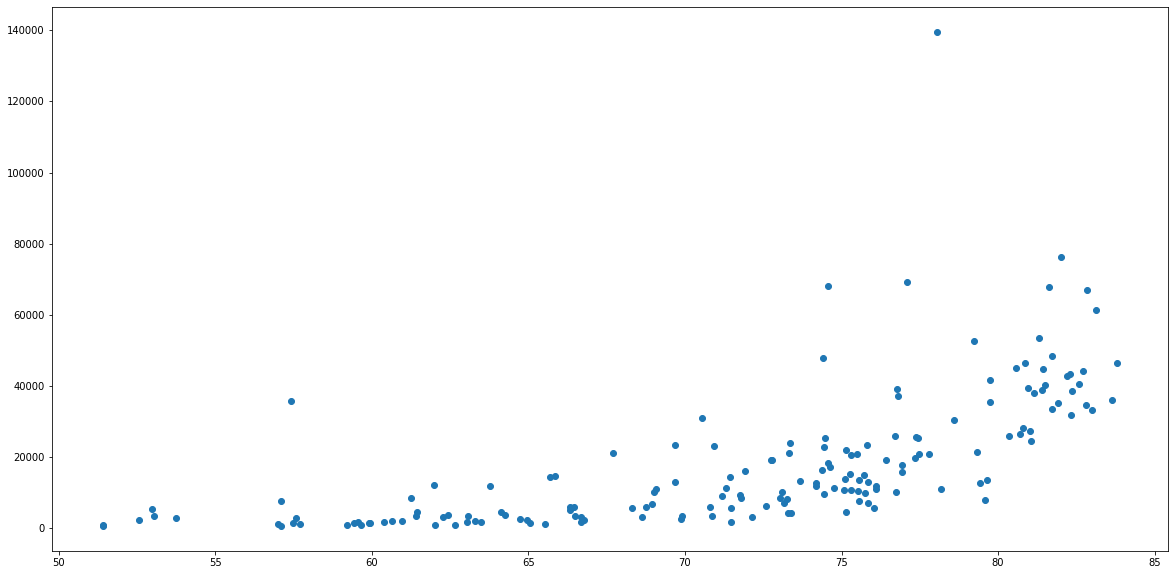

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

df = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
df=df.loc[df['Year'] == 2015]
df=df.dropna(subset=['Life expectancy at birth (years)', 'GDP per capita ($)'])

z = df['Life expectancy at birth (years)']
y = df['GDP per capita ($)']

plt.scatter(z, y)

n = df['Code']

for i, txt in enumerate(n):
    plt.annotate(txt, (z[i], y[i]))
    
plt.show()

print(df)

In [39]:
mean = df.mean()
mean

Year                                2.015000e+03
Life expectancy at birth (years)    7.173505e+01
GDP per capita ($)                  1.828101e+04
Population by country               4.490051e+07
dtype: float64

In [40]:
std = df.std()
std

Year                                0.000000e+00
Life expectancy at birth (years)    8.125762e+00
GDP per capita ($)                  1.926242e+04
Population by country               1.537380e+08
dtype: float64

In [44]:

df1 = df.loc[df['Life expectancy at birth (years)'] > mean['Life expectancy at birth (years)']+std['Life expectancy at birth (years)']]
df1['Entity']

2174          Australia
2460            Austria
4007            Belgium
7087             Canada
10283            Cyprus
11038           Denmark
14036           Finland
14989            France
16006           Germany
16447            Greece
18405         Hong Kong
18845           Iceland
19954           Ireland
20175            Israel
20405             Italy
20853             Japan
24735        Luxembourg
26341             Malta
30596       Netherlands
30882       New Zealand
32180            Norway
35395          Portugal
39114         Singapore
39554          Slovenia
40594       South Korea
41374             Spain
43040            Sweden
43261       Switzerland
47144    United Kingdom
49102    Western Europe
Name: Entity, dtype: object

In [51]:
highLife = mean['Life expectancy at birth (years)'] #+ std['Life expectancy at birth (years)']
highLife

71.7350473372781

In [52]:
lowGDP = mean['GDP per capita ($)'] #- std['GDP per capita ($)']
lowGDP

18281.005917159764

In [59]:
df2 = df.loc[df['GDP per capita ($)'] < lowGDP]
df2 = df2.loc[df2['Life expectancy at birth (years)'] > highLife]
df2['Entity']

502                     Albania
722                     Algeria
1822                    Armenia
2680                 Azerbaijan
3340                 Bangladesh
3560                   Barbados
5107     Bosnia and Herzegovina
5547                     Brazil
5987                   Bulgaria
7307                 Cape Verde
8453                      China
8673                   Colombia
9333                 Costa Rica
9997                       Cuba
11698        Dominican Republic
12193                   Ecuador
12641               El Salvador
15781                   Georgia
17019                 Guatemala
18185                  Honduras
19510                      Iran
20625                   Jamaica
21074                    Jordan
23085                   Lebanon
23943                     Libya
25021                 Macedonia
27067                 Mauritius
27626                    Mexico
28990                Montenegro
29276                   Morocco
31102                 Nicaragua
33126   

In [60]:
df3 = df.loc[df['GDP per capita ($)'] > lowGDP]
df3 = df3.loc[df3['Life expectancy at birth (years)'] < highLife]
df3['Entity']

12861      Equatorial Guinea
21294             Kazakhstan
36188                 Russia
45241    Trinidad and Tobago
45911           Turkmenistan
Name: Entity, dtype: object

These countries have high gdp but low life expectancy.

## Corruption and trust in government

In [165]:
trust = pd.read_csv("share-who-trust-government.csv")
corruption = pd.read_csv("TI-corruption-perception-index.csv")

trust=trust.loc[trust['Year'] == 2018]
#trust=trust.dropna(subset=['Share of people who trust their national government (%)'])

corruption=corruption.loc[corruption['Year'] == 2018]
#df=df.dropna(subset=['Corruption Perception Index'])

corruption

,Entity,Code,Year,Corruption Perception Index
6,Afghanistan,AFG,2018,16
13,Albania,ALB,2018,36
20,Algeria,DZA,2018,35
27,Angola,AGO,2018,19
34,Argentina,ARG,2018,40
...,...,...,...,...
1200,Venezuela,VEN,2018,18
1207,Vietnam,VNM,2018,33
1214,Yemen,YEM,2018,14
1221,Zambia,ZMB,2018,35


In [172]:
#trust.set_index(['Entity', 'Code', 'Year'], inplace=True)
#corruption.set_index(['Entity', 'Code', 'Year'], inplace=True)
corruption.reset_index()
corruption.set_index('Entity', inplace = True)
trust.set_index('Entity', inplace =True)
corruption = corruption.drop(columns = ['Code', 'Year'])

#ct = trust.join(corruption)

#plt.scatter(ct['Corruption Perception Index'], ct['Share of people who trust their national government (%)'])
#plt.show()



KeyError: "None of ['Entity'] are in the columns"

In [176]:
meanCT = ct.mean()

ct2 = ct.loc[ct['Corruption Perception Index'] < meanCT['Corruption Perception Index']]
ct3 = ct2.loc[ct2['Share of people who trust their national government (%)'] > meanCT['Share of people who trust their national government (%)']]

#ct3.drop('Code',axis=1, inplace =True)
#ct3.reset_index()
#ct3 = ct3.drop(columns=["Code"])
#ct3 = ct3.drop('Code',1)
#del ct3['Code']
#ct3.columns = ct3.columns.astype(int)
#ct3 = ct3.drop(ct3.columns[[1,2]],axis=1)
#ct3.set_index('Entity', inplace=True)
#ct3.columns

ct3
#meanCT

,,,Share of people who trust their national government (%),Corruption Perception Index
Entity,Code,Year,,
Armenia,ARM,2018,79.742444,35.0
Azerbaijan,AZE,2018,88.280274,25.0
Bangladesh,BGD,2018,85.599574,26.0
Burkina Faso,BFA,2018,54.661103,41.0
Burundi,BDI,2018,60.460616,17.0
Dominican Republic,DOM,2018,54.976300,30.0
Ethiopia,ETH,2018,92.341298,34.0
Gambia,GMB,2018,71.551324,37.0
Ghana,GHA,2018,65.843099,41.0
